In [1]:
import numpy as np

In [11]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
num_labels = len(np.unique(y_train))

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
image_size = x_train.shape[1]
input_size = image_size * image_size

In [16]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [17]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [18]:
model = Sequential()
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0

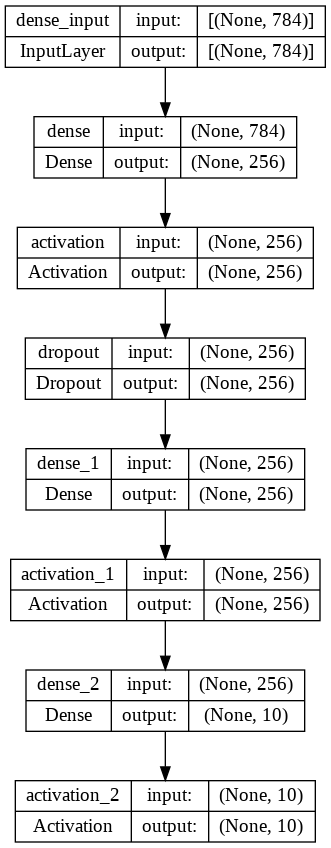

In [19]:
plot_model(model, to_file='mlp_mnist.png', show_shapes=True)

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, epochs=25, batch_size=batch_size)

Epoch 1/25
469/469 [==============================] - 5s 10ms/step - loss: 0.0335 - accuracy: 0.9888
Epoch 2/25
469/469 [==============================] - 5s 10ms/step - loss: 0.0370 - accuracy: 0.9874
Epoch 3/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0329 - accuracy: 0.9886
Epoch 4/25
469/469 [==============================] - 5s 10ms/step - loss: 0.0347 - accuracy: 0.9883
Epoch 5/25
469/469 [==============================] - 5s 12ms/step - loss: 0.0301 - accuracy: 0.9901
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0320 - accuracy: 0.9896
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0267 - accuracy: 0.9908
Epoch 8/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0316 - accuracy: 0.9895
Epoch 9/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0303 - accuracy: 0.9901
Epoch 10/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0290 - accuracy: 0.

In [28]:
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print("Accuracy: %.lf%%" % (100 * acc))

Accuracy: 98%
